## Quickstart on Anndata

Running GGML with alpha: 10.0, reg: 1.0, reg_type: 2, n_comps: 2


100%|██████████| 5/5 [01:21<00:00, 16.36s/it]


Iteration 1 with Loss  497.468017578125


100%|██████████| 5/5 [01:01<00:00, 12.37s/it]


Iteration 2 with Loss  441.3917236328125


100%|██████████| 5/5 [00:57<00:00, 11.44s/it]


Iteration 3 with Loss  389.916015625


100%|██████████| 5/5 [00:56<00:00, 11.37s/it]


Iteration 4 with Loss  339.1381530761719


100%|██████████| 5/5 [00:57<00:00, 11.44s/it]


Iteration 5 with Loss  290.2022399902344


100%|██████████| 5/5 [00:57<00:00, 11.59s/it]


Iteration 6 with Loss  243.32559204101562


100%|██████████| 5/5 [01:01<00:00, 12.21s/it]


Iteration 7 with Loss  198.95672607421875


100%|██████████| 5/5 [01:00<00:00, 12.13s/it]


Iteration 8 with Loss  158.46388244628906


100%|██████████| 5/5 [00:58<00:00, 11.76s/it]


Iteration 9 with Loss  123.26885986328125


100%|██████████| 5/5 [00:58<00:00, 11.67s/it]


Iteration 10 with Loss  95.95309448242188
Compute all OT distances after 10 iterations


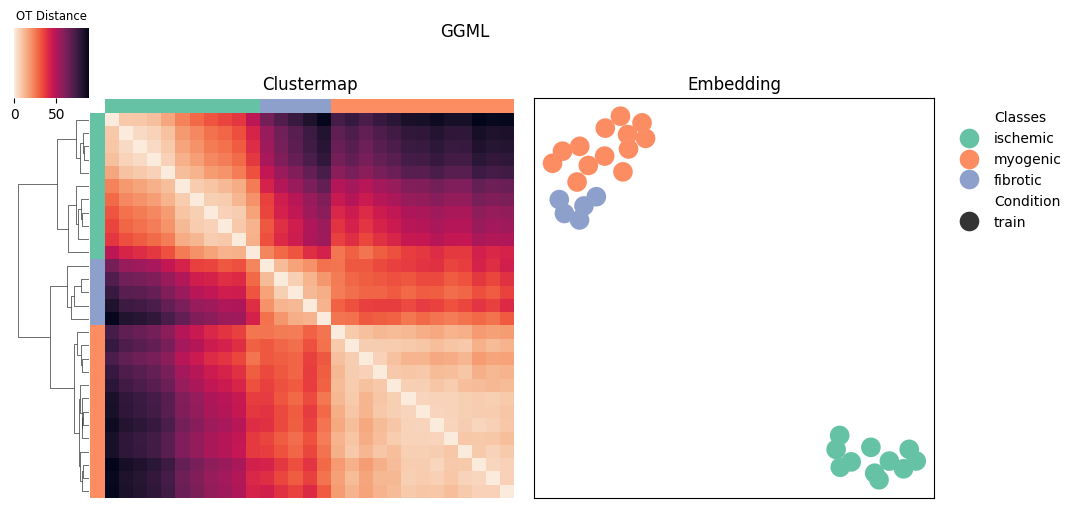

In [1]:
import ggml_ot

# Load Anndata from CELLxGENE
id = "c1f6034b-7973-45e1-85e7-16933d0550bc.h5ad"
adata = ggml_ot.data.load_cellxgene(id)

# Setup Dataset from Anndata
dataset = ggml_ot.from_anndata(adata, patient_col="sample", label_col="patient_group")

# Train GGML on all patients
dataset.train(n_comps=2)

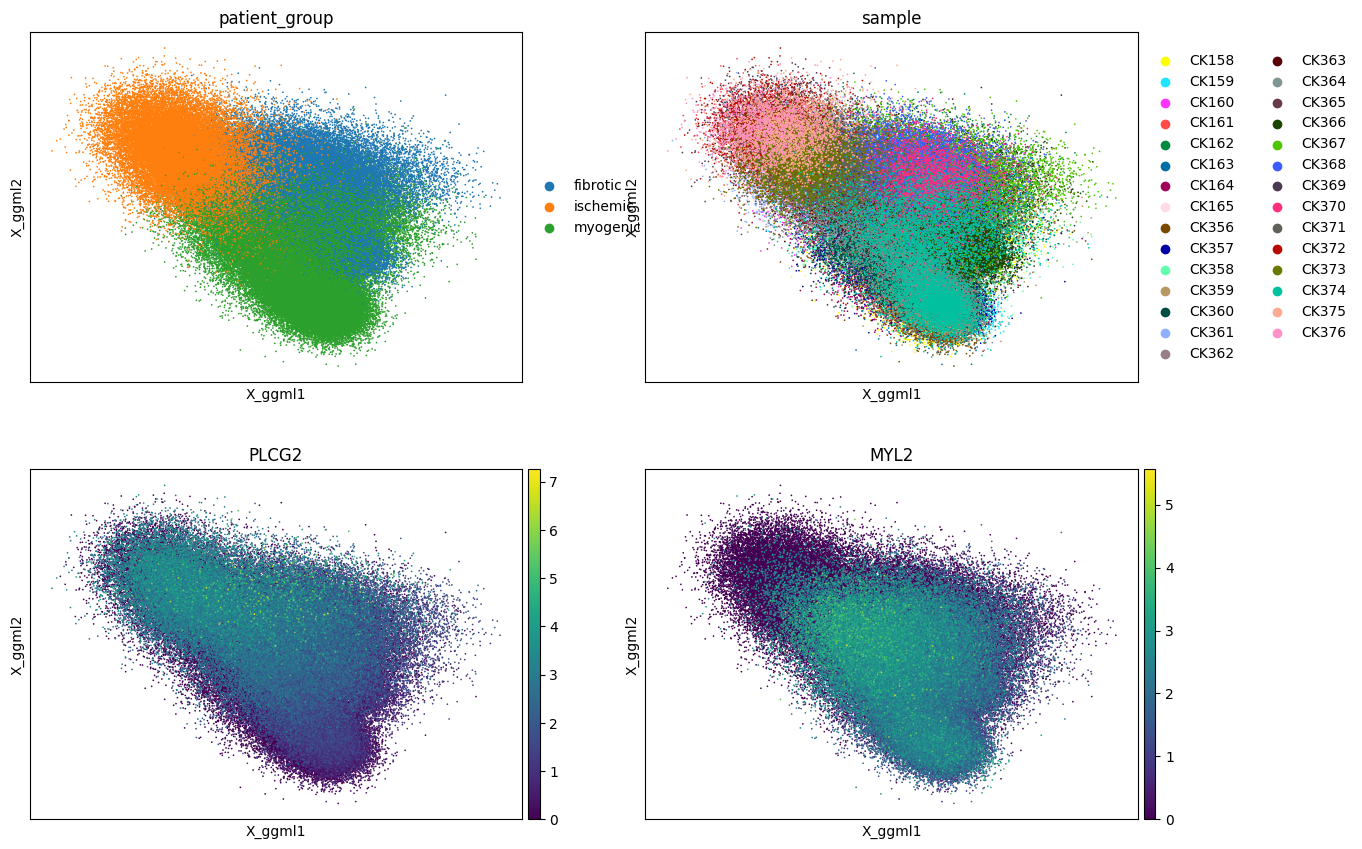

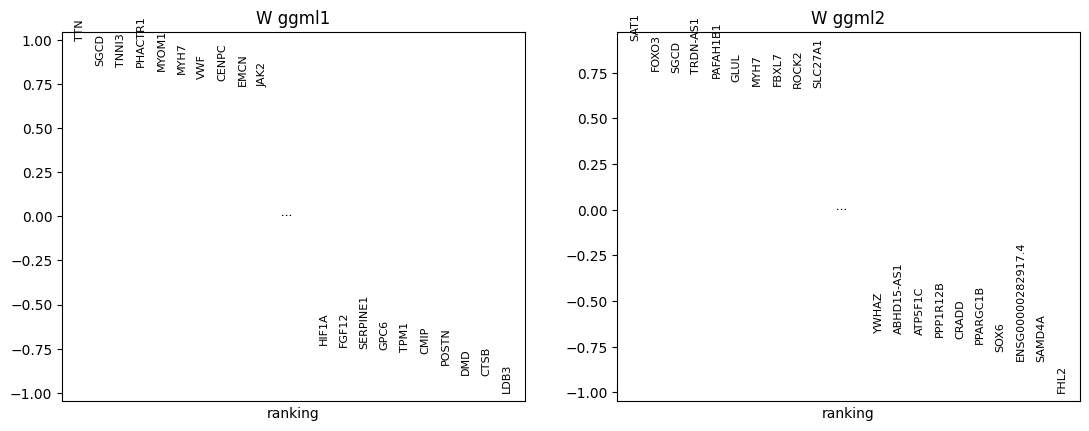

In [2]:
import scanpy as sc

# Access adata with learned metric
adata = dataset.adata

# Show cells embedded in low-dimensional gene subspace (adata.obsm["X_ggml"])
sc.pl.embedding(adata,basis="X_ggml",color=["patient_group","sample","PLCG2","MYL2"], 
                s=6,gene_symbols="feature_name",use_raw=False,ncols=2) 

# Rank loadings of learned gene subspace (adata.varm["W_ggml"])
ggml_ot.gene.ranking(adata,gene_symbols="feature_name")

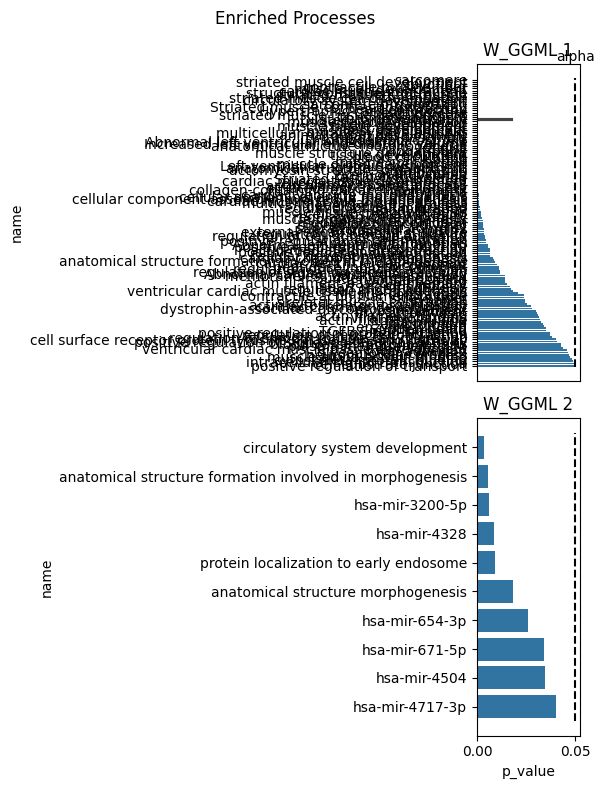

In [3]:
ggml_ot.gene.enrichment(adata,gene_symbols="feature_name",n_genes=25,alpha=0.05)